In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
namesngenre = np.load('./dataset/namesngenre.npy')

In [5]:
namesngenre

array([['Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       ['Jumanji (1995)', 'Adventure|Children|Fantasy'],
       ['Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       ['Elsa & Fred (2005)', 'Comedy|Drama|Romance'],
       ['Tomb Raider (2018)', 'Action|Adventure|Fantasy'],
       ['Fred Armisen: Standup for Drummers (2018)', 'Comedy']],
      dtype='<U158')

In [6]:
ratings_train = np.load('./dataset/ratings_train.npy')

In [7]:
ratings_train.shape

(610, 4980)

In [8]:
ratings_train

array([[ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  2., nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [9]:
np.nanmax(ratings_train)

5.0

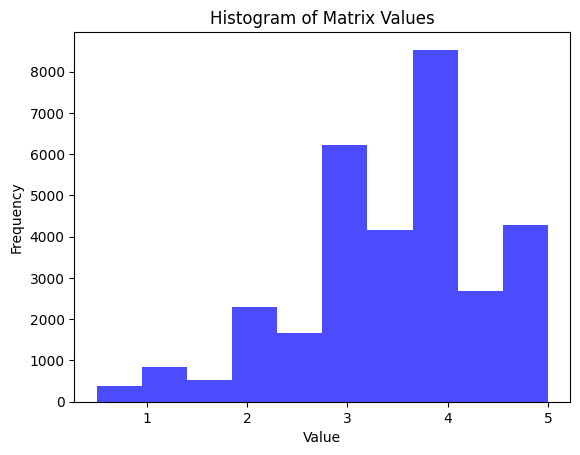

In [10]:
from scipy.stats import norm, fit
# Flatten the matrix to a 1D array to create the histogram
values = ratings_train.flatten()
values = values[~np.isnan(values)]
# Fit a normal distribution to the histogram
mu, std = norm.fit(values)

# Set the number of bins for the histogram
num_bins = 20

# Create the histogram plot
plt.hist(values, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')

# Show the histogram
plt.show()

Mean (mu): 3.524605987720742
Standard Deviation (sigma): 1.0326053351746378


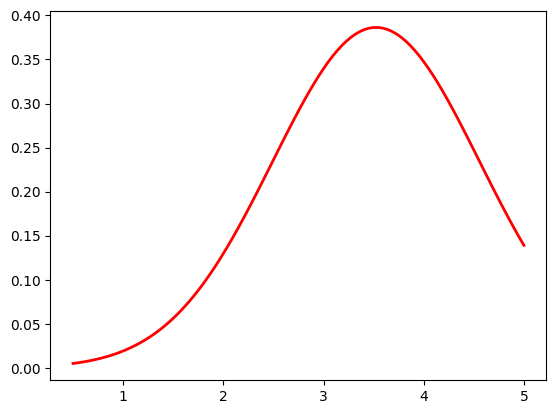

In [11]:
# Create the x-axis values for the normal distribution curve
x = np.linspace(min(values), max(values), 100)
pdf = norm.pdf(x, mu, std)

# Plot the histogram
plt.plot(x, pdf, 'r-', linewidth=2)

# Print the parameters of the best-fit normal distribution
print(f"Mean (mu): {mu}")
print(f"Standard Deviation (sigma): {std}")

# Product of two gaussians

Our R matrix will be the result of the product of two other matrices. In order to have a good initialization of these two matrices, we may assume that R follows the gaussian distribution below, and initialize our matrices I and U using gaussian distribitutions that result in the gaussian above.

$$ R = IU^T $$

$$ E(R) = \mu_I \cdot \mu_U $$

\begin{align*}
\text{Var}(R) &= (\sigma_I^2 + \mu_I^2) \cdot (\sigma_U^2 + \mu_U^2) - (\mu_I \cdot \mu_U)^2 \\
              &= \sigma_I^2 \cdot \sigma_U^2 + \sigma_I^2 \cdot \mu_U^2 + \mu_I^2 \cdot \sigma_U^2 + \mu_I^2 \cdot \mu_U^2 - (\mu_I \cdot \mu_U)^2
\end{align*}

We can take U and I with equal distributions, so we have:

$$ E(R) = \mu \cdot \mu  = \mu^2$$

\begin{align*}
\text{Var}(R) &= (\sigma^2 + \mu^2) \cdot (\sigma^2 + \mu^2) - (\mu \cdot \mu)^2 \\
              &= \sigma^2 \cdot \sigma^2 + \sigma^2 \cdot \mu^2 + \mu^2 \cdot \sigma^2 + \mu^2 \cdot \mu^2 - (\mu \cdot \mu)^2
              &= \sigma^4 + 2 \cdot \mu^2 \cdot \sigma^2
\end{align*}

In [12]:
mu_UI = mu**0.5
mu_UI

1.8773934024920673

In [13]:
from scipy.optimize import fsolve

# Define the equation
def equation(sigma, var_R, mu_UI):
    return sigma**4 + 2 * mu_UI**2 * sigma**2 - var_R

# Define the known values
var_R = std**2

initial_guess = 1.0
sigma = fsolve(equation, initial_guess, args=(var_R, mu_UI))[0]

print("The value of sigma is:", sigma)

The value of sigma is: 0.38489986190541


The values calculated above are going to be used in the U and I matrix initialization (recalculated in the MF class).

In [57]:
import MF
import importlib

# Reload a specific module
importlib.reload(MF)

<module 'MF' from 'c:\\Users\\User\\Documents\\Estudos\\M2 Dauphine\\Data Science Lab\\collaborativer_filter_user_recommendation\\collaborative_filter\\MF.py'>

In [58]:
k = 10

MF = MF.MatrixFactorizarion(ratings_train, l=0.001, mu=0.001, k=k)


In [59]:
print(MF.C(MF.R, MF.I, MF.U, l=0.01, mu=0.01))

3759202765.552539


In [61]:
MF.fit(lr_I=0.000001, lr_U=0.000001, num_iterations=100)

[[   0    0]
 [   0   44]
 [   0   58]
 [   0   86]
 [   0  104]
 [   0  153]
 [   0  168]
 [   0  187]
 [   0  296]
 [   0  394]
 [   0  412]
 [   0  413]
 [   0  442]
 [   0  473]
 [   0  489]
 [   0  623]
 [   0  647]
 [   0  658]
 [   0  666]
 [   0  685]
 [   0  711]
 [   0  719]
 [   0  723]
 [   0  781]
 [   0  837]
 [   0  859]
 [   0  924]
 [   0  935]
 [   0  942]
 [   0  975]
 [   0  984]
 [   0 1029]
 [   0 1107]
 [   0 1124]
 [   0 1162]
 [   0 1172]
 [   0 1178]
 [   0 1189]
 [   0 1229]
 [   0 1250]
 [   0 1251]
 [   0 1273]
 [   0 1337]
 [   0 1348]
 [   0 1387]
 [   0 1396]
 [   0 1438]
 [   0 1467]
 [   0 1509]
 [   0 1510]
 [   0 1558]
 [   0 1572]
 [   0 1590]
 [   0 1595]
 [   0 1687]
 [   0 1700]
 [   0 1730]
 [   0 1731]
 [   0 1737]
 [   0 1754]
 [   0 1757]
 [   0 1776]
 [   0 1859]
 [   0 1889]
 [   0 1892]
 [   0 2038]
 [   0 2089]
 [   0 2115]
 [   0 2135]
 [   0 2161]
 [   0 2261]]


ValueError: setting an array element with a sequence.

In [ ]:
prediction_full = MF.predict()

## Result analysis

__Attention:__ Here we pick only the non nan values, which returns a 1-D array. Then we reshape a part of them so we can see it as a image and visually comapre the results.

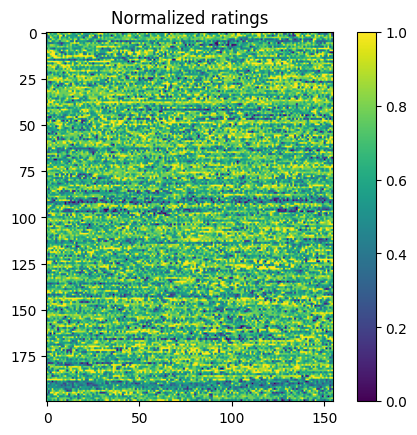

In [ ]:
non_nan_indices = np.where(~np.isnan(ratings_train))
# Separate the row and column indices
row_indices, col_indices = non_nan_indices
R_non_nan = MF.R[row_indices, col_indices]
normalized_ratings = (R_non_nan - np.min(R_non_nan)) / (np.max(R_non_nan) - np.min(R_non_nan))
normalized_ratings = normalized_ratings[:normalized_ratings.shape[0]//1000 * 1000].reshape(200, -1)

# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_ratings, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized ratings')
plt.show()


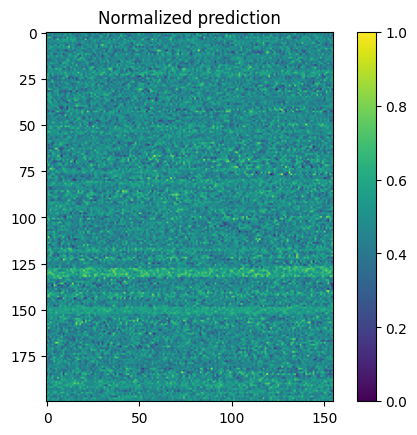

In [ ]:
# Separate the row and column indices
row_indices, col_indices = non_nan_indices

# Access the corresponding values in the second matrix
prediction = prediction_full[row_indices, col_indices]
normalized_prediction = (prediction - np.min(prediction)) / (np.max(prediction) - np.min(prediction))
normalized_prediction = normalized_prediction[:normalized_prediction.shape[0]//1000 * 1000].reshape(200, -1)
# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_prediction, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized prediction')
plt.show()

In [ ]:

MF.RMSE(prediction, R_non_nan)

1.6042675767386232